In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
X_test = pd.read_csv('test.csv')

In [9]:
sample_submission = pd.read_csv('sample_submission.csv')

In [10]:
sample_submission.head()

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames


In [13]:
train_file = pd.read_csv('train.csv')

In [14]:
train_file.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [15]:
target = train_file['category']

In [17]:
data = train_file.drop('category', axis=1)

In [18]:
data.head()

,oid,text
0,365271984,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [19]:
X_test.head()

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...


In [20]:
X_test['text'] = X_test['text'].str.lower()

In [21]:
data['text'] = data['text'].str.lower()

In [22]:
data.head()

,oid,text
0,365271984,волшебные фото виктория поплавская евгениямедв...
1,503385563,возвращение в подземелье треша 33 эйфория тупо...
2,146016084,лучшие чешские вратари – доминик доминатор гаш...
3,933865449,rtokenoid warhammer40k валрак решил нас подкор...
4,713550145,шестеркин затаскивает рейнджерс в финал восточ...


In [24]:
cv = CountVectorizer()
cv.fit(data['text'])

len(cv.vocabulary_)

146608

In [25]:
data_transform = cv.transform(data['text'])

In [29]:
test_transform = cv.transform(X_test['text'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, y_train, y_val = train_test_split(data_transform, target, test_size=0.30, random_state=0)

In [77]:
logit = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=7, C=1)
logit.fit(X_train, y_train)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [75]:
round(logit.score(X_train, y_train), 3) # Train score

0.995

In [76]:
round(logit.score(X_val, y_val), 3) # Val score

0.821

In [43]:
from sklearn.model_selection import learning_curve, validation_curve

In [47]:
logit_no_c = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=7)

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
val_curve_train, val_curve_test = validation_curve(
    estimator=logit_no_c, X=data_transform, y=target, param_name="C", param_range=[0.3, 0.6, 1, 3], cv=3, n_jobs=-1
)

In [66]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

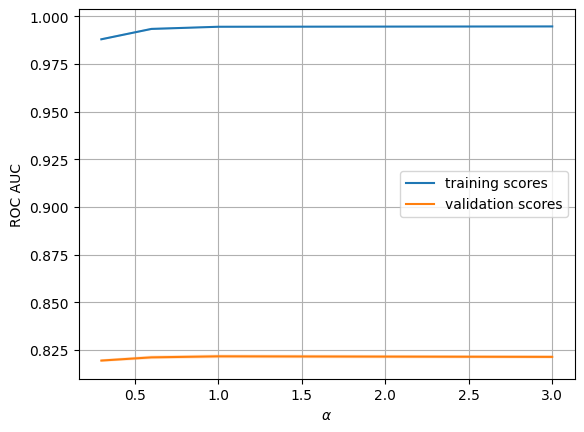

In [70]:
plot_with_err([0.3, 0.6, 1, 3], val_curve_train, label="training scores")
plot_with_err([0.3, 0.6, 1, 3], val_curve_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend()
plt.grid(True);

### C = 1.0 works best

# Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV

In [203]:
rf_plain = RandomForestClassifier(n_estimators = 200, random_state=0, n_jobs=-1, verbose=1, min_samples_split=5)

In [204]:
rf_plain.fit(data_transform, target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.6min finished


RandomForestClassifier(min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=0, verbose=1)

In [ ]:
round(rf_plain.score(X_train, y_train), 3) # Train score

In [ ]:
round(rf_plain.score(X_val, y_val), 3) # Val score

In [205]:
round(rf_plain.score(data_transform, target), 3) # OOB score

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    5.1s finished


0.993

In [ ]:
rf_search = RandomForestClassifier(random_state=0, n_jobs=-1, verbose=1)

In [129]:
params = {'max_depth': [50, 100], 'n_estimators': [100, 300]}

In [130]:
search = GridSearchCV(estimator=rf_search, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [131]:
search.fit(data_transform, target)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [50, 100], 'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [133]:
search.best_estimator_

RandomForestClassifier(max_depth=100, n_estimators=300, n_jobs=-1,
                       random_state=0, verbose=1)

In [134]:
search.best_score_

0.7565048615238256

In [206]:
rf_probs = pd.DataFrame(rf_plain.predict_proba(test_transform))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.5s finished


In [207]:
rf_probs_values = pd.DataFrame([max(i) for i in rf_probs.values])

In [208]:
rf_probs_values.head()

,0
0,0.277690
1,0.131696
2,0.418512
3,0.700018
4,0.718093


In [209]:
rf_pred = pd.DataFrame(rf_plain.predict(test_transform))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.5s finished


In [210]:
rf_pred.head()

,0
0,esport
1,autosport
2,tennis
3,esport
4,tennis


In [190]:
X_test.head()

,oid,text
0,749208109,спочно сообщество продается за 1300р за покупк...
1,452466036,естественное восстановление после тяжелой трен...
2,161038103,тема нарядов продолжается одна из британских ж...
3,663621910,привет избранный. ты спрашиваешь себя что здес...
4,566255305,король пятисотников в деле андрей рублев успеш...


In [191]:
X_test = X_test.drop('text', axis=1)

In [192]:
X_test.head()

,oid
0,749208109
1,452466036
2,161038103
3,663621910
4,566255305


In [211]:
X_test['category'] = rf_pred

In [194]:
X_test.head()

,oid,category
0,749208109,esport
1,452466036,extreme
2,161038103,tennis
3,663621910,esport
4,566255305,tennis


In [212]:
X_test['prob'] = rf_probs_values

In [196]:
X_test.head()

,oid,category,prob
0,749208109,esport,0.312976
1,452466036,extreme,0.141393
2,161038103,tennis,0.430857
3,663621910,esport,0.635702
4,566255305,tennis,0.720899


In [213]:
final = X_test[X_test.prob >= 0.7]

In [214]:
final.head()

,oid,category,prob
3,663621910,esport,0.700018
4,566255305,tennis,0.718093
8,720955404,boardgames,0.753058
12,463889624,boardgames,0.707829
16,867549202,boardgames,0.914091


In [216]:
sub = final.drop('prob', axis=1)

In [217]:
sub.head()

,oid,category
3,663621910,esport
4,566255305,tennis
8,720955404,boardgames
12,463889624,boardgames
16,867549202,boardgames


In [218]:
sub.to_csv('submis_rf_07.csv')

# SGDClassifier

In [219]:
from sklearn.linear_model import SGDClassifier

In [220]:
sgd = SGDClassifier(loss='log_loss', random_state=0, verbose=1, n_jobs=3)

In [221]:
sgd.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


-- Epoch 1-- Epoch 1

-- Epoch 1
Norm: 102.03, NNZs: 122984, Bias: -6.714777, T: 27118, Avg. loss: 1.413424
Total training time: 0.02 seconds.
Norm: 98.27, NNZs: 122823, Bias: -8.616711, T: 27118, Avg. loss: 1.272148
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 2
Norm: 83.63, NNZs: 122948, Bias: -5.574587, T: 27118, Avg. loss: 0.925293
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 58.85, NNZs: 123170, Bias: -7.993533, T: 54236, Avg. loss: 0.104116
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 63.94, NNZs: 123170, Bias: -5.814926, T: 54236, Avg. loss: 0.149059
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 51.73, NNZs: 123170, Bias: -4.779799, T: 54236, Avg. loss: 0.084308
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 47.07, NNZs: 123170, Bias: -7.543321, T: 81354, Avg. loss: 0.073651
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 49.15, NNZs: 123170, Bias: -5.302995, T: 81354, Avg. loss: 0.074168
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 

Norm: 24.46, NNZs: 123170, Bias: -6.046638, T: 325416, Avg. loss: 0.019885Norm: 91.70, NNZs: 122912, Bias: -3.643725, T: 27118, Avg. loss: 1.257611
Total training time: 0.02 seconds.

Total training time: 0.34 seconds.
-- Epoch 2
-- Epoch 13
Norm: 35.95, NNZs: 123170, Bias: -4.256286, T: 189826, Avg. loss: 0.055748
Total training time: 0.19 seconds.
-- Epoch 8
Norm: 24.16, NNZs: 123170, Bias: -6.004285, T: 352534, Avg. loss: 0.019781
Total training time: 0.36 seconds.
Convergence after 13 epochs took 0.36 seconds
-- Epoch 1
Norm: 55.63, NNZs: 123170, Bias: -3.036131, T: 54236, Avg. loss: 0.119861
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 88.87, NNZs: 122891, Bias: -6.655489, T: 27118, Avg. loss: 1.359551
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 34.12, NNZs: 123170, Bias: -4.137816, T: 216944, Avg. loss: 0.054248
Total training time: 0.22 seconds.
-- Epoch 9
Norm: 42.54, NNZs: 123170, Bias: -2.764678, T: 81354, Avg. loss: 0.076141
Total training time: 0.08 seconds.


Norm: 30.39, NNZs: 123170, Bias: -4.199885, T: 216944, Avg. loss: 0.039621
Total training time: 0.14 seconds.
-- Epoch 9
Norm: 26.10, NNZs: 123170, Bias: -3.747813, T: 244062, Avg. loss: 0.037970
Total training time: 0.18 seconds.
Convergence after 9 epochs took 0.18 seconds
Norm: 29.42, NNZs: 123170, Bias: -4.112291, T: 244062, Avg. loss: 0.039768
Total training time: 0.16 seconds.
-- Epoch 10
Norm: 28.70, NNZs: 123170, Bias: -4.037490, T: 271180, Avg. loss: 0.039783
Total training time: 0.17 seconds.
Convergence after 10 epochs took 0.17 seconds


[Parallel(n_jobs=3)]: Done  13 out of  13 | elapsed:    1.2s finished


SGDClassifier(loss='log_loss', n_jobs=3, random_state=0, verbose=1)

In [222]:
sgd.score(X_train, y_train) # Train score

0.9775057157607493

In [223]:
sgd.score(X_val, y_val) # Val score

0.8153501979005334

In [224]:
pred_probs1 = sgd.predict_proba()

ValueError: could not convert string to float: 'esport'

In [ ]:
sgd_search = GridSearchCV(estimator)